In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# โหลดข้อมูล 
df = pd.read_csv("output3.csv")

In [3]:
# ดูขนาดของข้อมูล
print("Shape of dataset:", df.shape)

Shape of dataset: (7525, 23)


In [4]:
# ดูตัวอย่างข้อมูล 5 แถวแรก
print("\nSample data:")
print(df.head())


Sample data:
   SEX  AGE  Injp  Risk1  Risk2  Risk4  Risk5  Ais1  Ais2  Ais3  ...  GCS  \
0    2   52     3      2      2      2      2     1     3     2  ...    3   
1    1   35     2      1      0      0      0     1     3     2  ...    4   
2    1   17     2      0      2      0      0     1     2     3  ...    3   
3    1   24     2      1      0      2      2     1     2     1  ...    4   
4    1   20     2      1      0      0      0     0     1     1  ...    2   

   SBP  RR   PR   Time  Dead  ISS   RTS  SBP_group  RR_group  
0  125  20  125  284.0     1   14  6.61          4         3  
1  172  20   54  181.0     1   14  7.55          4         3  
2  140  20  112  206.0     1   14  6.61          4         3  
3   89  18  135  471.0     1    6  6.82          3         3  
4  155  28  135  480.0     1    6  5.68          4         3  

[5 rows x 23 columns]


In [5]:
# ดูข้อมูลเบื้องต้น (ชนิดข้อมูล, ค่าที่หายไป, memory)
print("\nInfo:")
print(df.info())


Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7525 entries, 0 to 7524
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SEX        7525 non-null   int64  
 1   AGE        7525 non-null   int64  
 2   Injp       7525 non-null   int64  
 3   Risk1      7525 non-null   int64  
 4   Risk2      7525 non-null   int64  
 5   Risk4      7525 non-null   int64  
 6   Risk5      7525 non-null   int64  
 7   Ais1       7525 non-null   int64  
 8   Ais2       7525 non-null   int64  
 9   Ais3       7525 non-null   int64  
 10  Ais4       7525 non-null   int64  
 11  Ais5       7525 non-null   int64  
 12  Ais6       7525 non-null   int64  
 13  GCS        7525 non-null   int64  
 14  SBP        7525 non-null   int64  
 15  RR         7525 non-null   int64  
 16  PR         7525 non-null   int64  
 17  Time       7525 non-null   float64
 18  Dead       7525 non-null   int64  
 19  ISS        7525 non-null   int64  
 20  R

In [6]:
# ดูสถิติเบื้องต้น (เฉลี่ย, sd, min, max, quartile)
print("\nDescribe:")
print(df.describe(include="all"))


Describe:
               SEX          AGE         Injp        Risk1        Risk2  \
count  7525.000000  7525.000000  7525.000000  7525.000000  7525.000000   
mean      1.206113    35.600266     2.094485     0.651694     1.921595   
std       0.404539    18.240440     0.400329     0.755284     0.388179   
min       1.000000     0.000000     1.000000     0.000000     0.000000   
25%       1.000000    20.000000     2.000000     0.000000     2.000000   
50%       1.000000    32.000000     2.000000     0.000000     2.000000   
75%       1.000000    49.000000     2.000000     1.000000     2.000000   
max       2.000000    93.000000     3.000000     2.000000     2.000000   

             Risk4        Risk5         Ais1         Ais2         Ais3  ...  \
count  7525.000000  7525.000000  7525.000000  7525.000000  7525.000000  ...   
mean      0.544585     0.270033     0.750432     2.276811     1.737674  ...   
std       0.852826     0.682750     0.432792     1.091044     1.153213  ...   
min   

In [7]:
# ตรวจสอบ missing values
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
SEX          0
AGE          0
Injp         0
Risk1        0
Risk2        0
Risk4        0
Risk5        0
Ais1         0
Ais2         0
Ais3         0
Ais4         0
Ais5         0
Ais6         0
GCS          0
SBP          0
RR           0
PR           0
Time         0
Dead         0
ISS          0
RTS          0
SBP_group    0
RR_group     0
dtype: int64



Target distribution:
Dead
1    6644
0     881
Name: count, dtype: int64


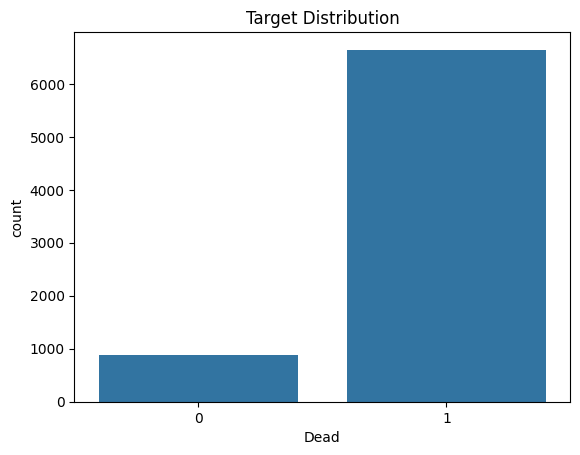

In [8]:
# ตรวจสอบ class balance 
if "Dead" in df.columns:
    print("\nTarget distribution:")
    print(df["Dead"].value_counts())

    sns.countplot(x="Dead", data=df)
    plt.title("Target Distribution")
    plt.show()

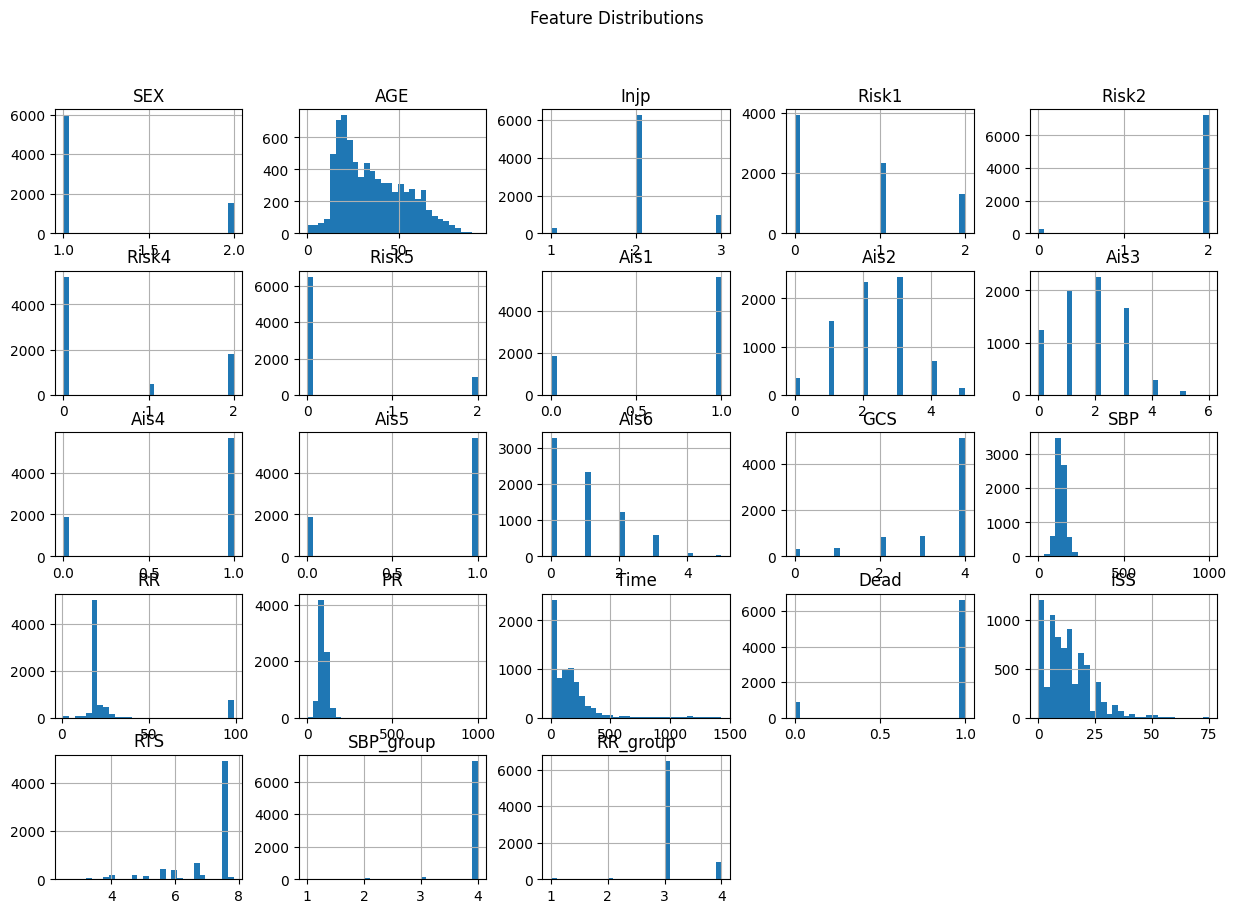

In [9]:
# ดูการกระจายของตัวแปรเชิงตัวเลข
df.hist(bins=30, figsize=(15, 10))
plt.suptitle("Feature Distributions")
plt.show()

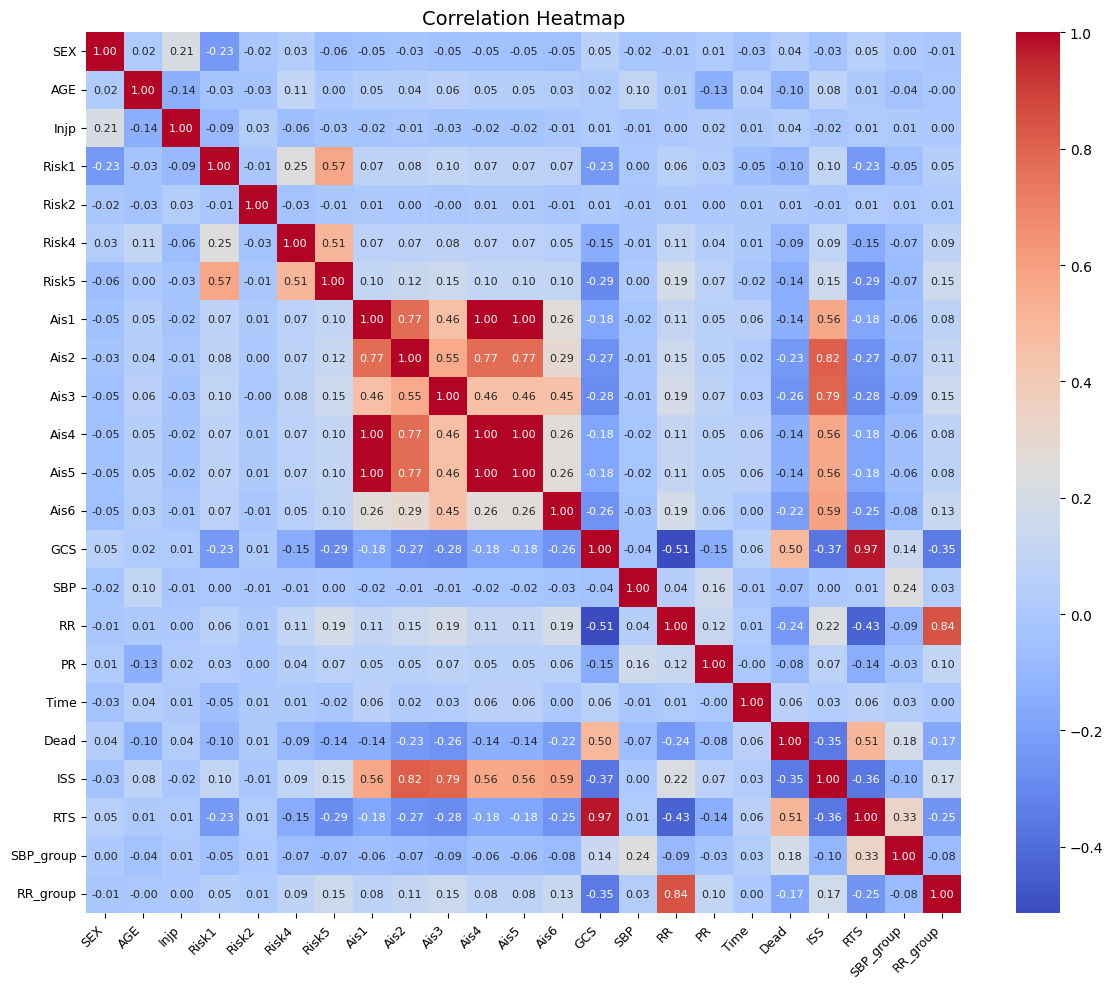

In [10]:
# ดูความสัมพันธ์ (Correlation Matrix)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,10))  # ขยายขนาดรูป
corr = df.corr()

sns.heatmap(
    corr,
    annot=True,          # แสดงตัวเลข
    fmt=".2f",           # ให้มีทศนิยม 2 ตำแหน่ง
    cmap="coolwarm",     # สีฟ้า-แดง
    annot_kws={"size":8} # ลดขนาดฟอนต์ตัวเลข
)

plt.xticks(rotation=45, ha="right", fontsize=9)  # หมุนชื่อแกน X
plt.yticks(fontsize=9)                           # ปรับขนาดชื่อแกน Y
plt.title("Correlation Heatmap", fontsize=14)
plt.tight_layout()  # จัด layout ให้ไม่ทับกัน
plt.show()

In [ ]:
# K=5 การลองทำครั้งแรกเมื่อยังไม่ได้ตัดข้อมูลสักตัว
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# โหลดข้อมูล
df = pd.read_csv('output3.csv')  
X = df.drop('Dead', axis=1).values 
y = df['Dead'].values

# สร้าง Stratified K-Fold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# กำหนดโมเดลที่ต้องการเทรน
models = {
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
    'LogisticRegression': LogisticRegression(max_iter=1000, random_state=42)
}

# เก็บผลลัพธ์ทั้งหมด
all_results = []

# เริ่ม loop cross-validation
fold = 1
for train_idx, test_idx in kf.split(X, y):
    print(f"\n=== Fold {fold} ===")

    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    for model_name, model in models.items():
        print(f"\n----- {model_name} -----")

        # เทรนโมเดล
        model.fit(X_train, y_train)

        # ทำนาย
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:,1]  # probability ของ class=1

        # คำนวณ metric
        acc = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_prob)
        cm = confusion_matrix(y_test, y_pred)
        recall_per_class = recall_score(y_test, y_pred, average=None)

        # แสดงผล
        print(f"Accuracy: {acc:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall (class=1): {recall:.4f}")
        print(f"Recall (class=0): {recall_per_class[0]:.4f}")
        print(f"Recall (class=1): {recall_per_class[1]:.4f}")
        print(f"F1-score: {f1:.4f}")
        print(f"AUC: {auc:.4f}")
        print(f"Confusion Matrix:\n{cm}")

        # เก็บผลลัพธ์
        all_results.append({
            'fold': fold,
            'model': model_name,
            'accuracy': acc,
            'precision': precision,
            'recall': recall,
            'recall_class_0': recall_per_class[0],
            'recall_class_1': recall_per_class[1],
            'f1_score': f1,
            'auc': auc
        })

    fold += 1

# แปลงเป็น DataFrame
results_df = pd.DataFrame(all_results)

# แสดงผลลัพธ์รวม
print("\n=== Summary ===")
print(results_df)

# แสดงค่าเฉลี่ยของแต่ละโมเดล
mean_metrics = results_df.groupby('model').mean()
print("\n=== Mean metrics by model ===")
print(mean_metrics)




=== Fold 1 ===

----- RandomForest -----
Accuracy: 0.9083
Precision: 0.9269
Recall (class=1): 0.9729
Recall (class=0): 0.4205
Recall (class=1): 0.9729
F1-score: 0.9493
AUC: 0.9080
Confusion Matrix:
[[  74  102]
 [  36 1293]]

----- LogisticRegression -----


c:\Users\ACER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.9056
Precision: 0.9242
Recall (class=1): 0.9729
Recall (class=0): 0.3977
Recall (class=1): 0.9729
F1-score: 0.9479
AUC: 0.9092
Confusion Matrix:
[[  70  106]
 [  36 1293]]

=== Fold 2 ===

----- RandomForest -----
Accuracy: 0.9116
Precision: 0.9359
Recall (class=1): 0.9661
Recall (class=0): 0.5000
Recall (class=1): 0.9661
F1-score: 0.9508
AUC: 0.9222
Confusion Matrix:
[[  88   88]
 [  45 1284]]

----- LogisticRegression -----


c:\Users\ACER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.9050
Precision: 0.9254
Recall (class=1): 0.9707
Recall (class=0): 0.4091
Recall (class=1): 0.9707
F1-score: 0.9475
AUC: 0.9159
Confusion Matrix:
[[  72  104]
 [  39 1290]]

=== Fold 3 ===

----- RandomForest -----
Accuracy: 0.9050
Precision: 0.9260
Recall (class=1): 0.9699
Recall (class=0): 0.4148
Recall (class=1): 0.9699
F1-score: 0.9474
AUC: 0.8815
Confusion Matrix:
[[  73  103]
 [  40 1289]]

----- LogisticRegression -----


c:\Users\ACER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.9037
Precision: 0.9199
Recall (class=1): 0.9759
Recall (class=0): 0.3580
Recall (class=1): 0.9759
F1-score: 0.9471
AUC: 0.8785
Confusion Matrix:
[[  63  113]
 [  32 1297]]

=== Fold 4 ===

----- RandomForest -----
Accuracy: 0.9050
Precision: 0.9278
Recall (class=1): 0.9676
Recall (class=0): 0.4318
Recall (class=1): 0.9676
F1-score: 0.9473
AUC: 0.9001
Confusion Matrix:
[[  76  100]
 [  43 1286]]

----- LogisticRegression -----


c:\Users\ACER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.9023
Precision: 0.9227
Recall (class=1): 0.9707
Recall (class=0): 0.3864
Recall (class=1): 0.9707
F1-score: 0.9461
AUC: 0.8931
Confusion Matrix:
[[  68  108]
 [  39 1290]]

=== Fold 5 ===

----- RandomForest -----
Accuracy: 0.9090
Precision: 0.9281
Recall (class=1): 0.9721
Recall (class=0): 0.4350
Recall (class=1): 0.9721
F1-score: 0.9496
AUC: 0.8979
Confusion Matrix:
[[  77  100]
 [  37 1291]]

----- LogisticRegression -----
Accuracy: 0.9096
Precision: 0.9269
Recall (class=1): 0.9744
Recall (class=0): 0.4237
Recall (class=1): 0.9744
F1-score: 0.9501
AUC: 0.8960
Confusion Matrix:
[[  75  102]
 [  34 1294]]

=== Summary ===
   fold               model  accuracy  precision    recall  recall_class_0  \
0     1        RandomForest  0.908306   0.926882  0.972912        0.420455   
1     1  LogisticRegression  0.905648   0.924232  0.972912        0.397727   
2     2        RandomForest  0.911628   0.935860  0.966140        0.500000   
3     2  LogisticRegression  0.904983   0.925

c:\Users\ACER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [12]:
# K=10 การลองทำครั้งแรกเมื่อยังไม่ได้ตัดข้อมูลสักตัว
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# โหลดข้อมูล
df = pd.read_csv('output3.csv')  
X = df.drop('Dead', axis=1).values 
y = df['Dead'].values

# สร้าง Stratified K-Fold
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# กำหนดโมเดลที่ต้องการเทรน
models = {
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
    'LogisticRegression': LogisticRegression(max_iter=1000, random_state=42)
}

# เก็บผลลัพธ์ทั้งหมด
all_results = []

# เริ่ม loop cross-validation
fold = 1
for train_idx, test_idx in kf.split(X, y):
    print(f"\n=== Fold {fold} ===")

    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    for model_name, model in models.items():
        print(f"\n----- {model_name} -----")

        # เทรนโมเดล
        model.fit(X_train, y_train)

        # ทำนาย
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:,1]  # probability ของ class=1

        # คำนวณ metric
        acc = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_prob)
        cm = confusion_matrix(y_test, y_pred)
        recall_per_class = recall_score(y_test, y_pred, average=None)

        # แสดงผล
        print(f"Accuracy: {acc:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall (class=1): {recall:.4f}")
        print(f"Recall (class=0): {recall_per_class[0]:.4f}")
        print(f"Recall (class=1): {recall_per_class[1]:.4f}")
        print(f"F1-score: {f1:.4f}")
        print(f"AUC: {auc:.4f}")
        print(f"Confusion Matrix:\n{cm}")

        # เก็บผลลัพธ์
        all_results.append({
            'fold': fold,
            'model': model_name,
            'accuracy': acc,
            'precision': precision,
            'recall': recall,
            'recall_class_0': recall_per_class[0],
            'recall_class_1': recall_per_class[1],
            'f1_score': f1,
            'auc': auc
        })

    fold += 1

# แปลงเป็น DataFrame
results_df = pd.DataFrame(all_results)

# แสดงผลลัพธ์รวม
print("\n=== Summary ===")
print(results_df)

# แสดงค่าเฉลี่ยของแต่ละโมเดล
mean_metrics = results_df.groupby('model').mean()
print("\n=== Mean metrics by model ===")
print(mean_metrics)




=== Fold 1 ===

----- RandomForest -----
Accuracy: 0.9057
Precision: 0.9292
Recall (class=1): 0.9669
Recall (class=0): 0.4432
Recall (class=1): 0.9669
F1-score: 0.9477
AUC: 0.9031
Confusion Matrix:
[[ 39  49]
 [ 22 643]]

----- LogisticRegression -----


c:\Users\ACER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.9084
Precision: 0.9257
Recall (class=1): 0.9744
Recall (class=0): 0.4091
Recall (class=1): 0.9744
F1-score: 0.9495
AUC: 0.9049
Confusion Matrix:
[[ 36  52]
 [ 17 648]]

=== Fold 2 ===

----- RandomForest -----
Accuracy: 0.9190
Precision: 0.9339
Recall (class=1): 0.9774
Recall (class=0): 0.4773
Recall (class=1): 0.9774
F1-score: 0.9552
AUC: 0.9128
Confusion Matrix:
[[ 42  46]
 [ 15 650]]

----- LogisticRegression -----


c:\Users\ACER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.9070
Precision: 0.9268
Recall (class=1): 0.9714
Recall (class=0): 0.4205
Recall (class=1): 0.9714
F1-score: 0.9486
AUC: 0.9126
Confusion Matrix:
[[ 37  51]
 [ 19 646]]

=== Fold 3 ===

----- RandomForest -----
Accuracy: 0.9057
Precision: 0.9329
Recall (class=1): 0.9624
Recall (class=0): 0.4773
Recall (class=1): 0.9624
F1-score: 0.9474
AUC: 0.9132
Confusion Matrix:
[[ 42  46]
 [ 25 640]]

----- LogisticRegression -----


c:\Users\ACER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.8951
Precision: 0.9174
Recall (class=1): 0.9684
Recall (class=0): 0.3409
Recall (class=1): 0.9684
F1-score: 0.9422
AUC: 0.9111
Confusion Matrix:
[[ 30  58]
 [ 21 644]]

=== Fold 4 ===

----- RandomForest -----
Accuracy: 0.9270
Precision: 0.9472
Recall (class=1): 0.9714
Recall (class=0): 0.5909
Recall (class=1): 0.9714
F1-score: 0.9592
AUC: 0.9352
Confusion Matrix:
[[ 52  36]
 [ 19 646]]

----- LogisticRegression -----


c:\Users\ACER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.9124
Precision: 0.9334
Recall (class=1): 0.9699
Recall (class=0): 0.4773
Recall (class=1): 0.9699
F1-score: 0.9513
AUC: 0.9200
Confusion Matrix:
[[ 42  46]
 [ 20 645]]

=== Fold 5 ===

----- RandomForest -----
Accuracy: 0.8991
Precision: 0.9224
Recall (class=1): 0.9669
Recall (class=0): 0.3933
Recall (class=1): 0.9669
F1-score: 0.9441
AUC: 0.8868
Confusion Matrix:
[[ 35  54]
 [ 22 642]]

----- LogisticRegression -----


c:\Users\ACER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.8964
Precision: 0.9174
Recall (class=1): 0.9699
Recall (class=0): 0.3483
Recall (class=1): 0.9699
F1-score: 0.9429
AUC: 0.8707
Confusion Matrix:
[[ 31  58]
 [ 20 644]]

=== Fold 6 ===

----- RandomForest -----
Accuracy: 0.9043
Precision: 0.9241
Recall (class=1): 0.9714
Recall (class=0): 0.3977
Recall (class=1): 0.9714
F1-score: 0.9471
AUC: 0.8860
Confusion Matrix:
[[ 35  53]
 [ 19 645]]

----- LogisticRegression -----


c:\Users\ACER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.9082
Precision: 0.9196
Recall (class=1): 0.9819
Recall (class=0): 0.3523
Recall (class=1): 0.9819
F1-score: 0.9497
AUC: 0.8853
Confusion Matrix:
[[ 31  57]
 [ 12 652]]

=== Fold 7 ===

----- RandomForest -----
Accuracy: 0.9122
Precision: 0.9284
Recall (class=1): 0.9759
Recall (class=0): 0.4318
Recall (class=1): 0.9759
F1-score: 0.9515
AUC: 0.9231
Confusion Matrix:
[[ 38  50]
 [ 16 648]]

----- LogisticRegression -----


c:\Users\ACER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.9096
Precision: 0.9197
Recall (class=1): 0.9834
Recall (class=0): 0.3523
Recall (class=1): 0.9834
F1-score: 0.9505
AUC: 0.9119
Confusion Matrix:
[[ 31  57]
 [ 11 653]]

=== Fold 8 ===

----- RandomForest -----
Accuracy: 0.8963
Precision: 0.9259
Recall (class=1): 0.9593
Recall (class=0): 0.4205
Recall (class=1): 0.9593
F1-score: 0.9423
AUC: 0.8912
Confusion Matrix:
[[ 37  51]
 [ 27 637]]

----- LogisticRegression -----


c:\Users\ACER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.8936
Precision: 0.9232
Recall (class=1): 0.9593
Recall (class=0): 0.3977
Recall (class=1): 0.9593
F1-score: 0.9409
AUC: 0.8681
Confusion Matrix:
[[ 35  53]
 [ 27 637]]

=== Fold 9 ===

----- RandomForest -----
Accuracy: 0.9029
Precision: 0.9215
Recall (class=1): 0.9729
Recall (class=0): 0.3750
Recall (class=1): 0.9729
F1-score: 0.9465
AUC: 0.8793
Confusion Matrix:
[[ 33  55]
 [ 18 646]]

----- LogisticRegression -----


c:\Users\ACER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.9003
Precision: 0.9201
Recall (class=1): 0.9714
Recall (class=0): 0.3636
Recall (class=1): 0.9714
F1-score: 0.9451
AUC: 0.8778
Confusion Matrix:
[[ 32  56]
 [ 19 645]]

=== Fold 10 ===

----- RandomForest -----
Accuracy: 0.9122
Precision: 0.9333
Recall (class=1): 0.9699
Recall (class=0): 0.4773
Recall (class=1): 0.9699
F1-score: 0.9513
AUC: 0.9076
Confusion Matrix:
[[ 42  46]
 [ 20 644]]

----- LogisticRegression -----
Accuracy: 0.9215
Precision: 0.9365
Recall (class=1): 0.9774
Recall (class=0): 0.5000
Recall (class=1): 0.9774
F1-score: 0.9565
AUC: 0.9224
Confusion Matrix:
[[ 44  44]
 [ 15 649]]

=== Summary ===
    fold               model  accuracy  precision    recall  recall_class_0  \
0      1        RandomForest  0.905710   0.929191  0.966917        0.443182   
1      1  LogisticRegression  0.908367   0.925714  0.974436        0.409091   
2      2        RandomForest  0.918991   0.933908  0.977444        0.477273   
3      2  LogisticRegression  0.907039   0.926829  0

c:\Users\ACER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [13]:
# การทำ ANOVA
import pandas as pd
import numpy as np
from sklearn.feature_selection import f_classif

# --------------------
# 1) โหลดข้อมูล
df = pd.read_csv('output3.csv')

# Target = Dead (0 = เสียชีวิต, 1 = รอดชีวิต)
X = df.drop('Dead', axis=1)
y = df['Dead']

# --------------------
# 2) คำนวณค่า F-statistic และ p-value ด้วย ANOVA F-test
F_values, p_values = f_classif(X, y)

# --------------------
# 3) รวมค่าเป็นตาราง DataFrame
anova_df = pd.DataFrame({
    'Feature': X.columns,
    'F-statistic': F_values,
    'p-value': p_values
}).sort_values(by='p-value')

# เพิ่มคอลัมน์บอกว่ามีนัยสำคัญทางสถิติหรือไม่ (p ≤ 0.05)
anova_df['Significant (p≤0.05)'] = np.where(anova_df['p-value'] <= 0.05, 'Yes', 'No')

# --------------------
# 4) แสดงผลใน console
print("\n=== ANOVA Feature Selection Results ===")
print(anova_df)

# --------------------
# 5) เลือกเฉพาะฟีเจอร์ที่มีนัยสำคัญทางสถิติ (p ≤ 0.05)
significant_features = anova_df[anova_df['p-value'] <= 0.05]['Feature'].tolist()
removed_features = anova_df[anova_df['p-value'] > 0.05]['Feature'].tolist()

print(f"\nจำนวนฟีเจอร์ทั้งหมดก่อนคัดเลือก: {X.shape[1]}")
print(f"จำนวนฟีเจอร์ที่เหลือหลังคัดเลือก: {len(significant_features)}")
print(f"จำนวนฟีเจอร์ที่ถูกตัดออก: {len(removed_features)}")

print("\nฟีเจอร์ที่เหลือ (สำคัญ):", significant_features)
print("\nฟีเจอร์ที่ถูกตัดออก:", removed_features)

# --------------------
# 6) บันทึกตารางผล ANOVA เป็น Excel
output_file = 'anova_feature_selection_results.xlsx'
anova_df.to_excel(output_file, index=False)

print(f"\n✅ บันทึกตารางผล ANOVA เป็นไฟล์ Excel เรียบร้อยแล้ว: {output_file}")

# --------------------
# 7) บันทึกเฉพาะฟีเจอร์สำคัญ + target สำหรับใช้สร้างโมเดล
df_selected = df[significant_features + ['Dead']]
df_selected.to_csv('selected_features.csv', index=False)
print("\n✅ บันทึกไฟล์ 'selected_features.csv' สำหรับใช้สร้างโมเดลเรียบร้อยแล้ว")



=== ANOVA Feature Selection Results ===
      Feature  F-statistic        p-value Significant (p≤0.05)
13        GCS  2459.566707   0.000000e+00                  Yes
19        RTS  2600.098057   0.000000e+00                  Yes
18        ISS  1063.126444  3.043965e-218                  Yes
9        Ais3   556.367547  9.749440e-119                  Yes
15         RR   461.214343   2.401953e-99                  Yes
8        Ais2   439.524786   6.826322e-95                  Yes
12       Ais6   371.591595   7.338960e-81                  Yes
20  SBP_group   251.675413   8.924334e-56                  Yes
21   RR_group   231.411245   1.704169e-51                  Yes
6       Risk5   158.280866   6.170972e-36                  Yes
10       Ais4   144.777503   4.824043e-33                  Yes
7        Ais1   144.777503   4.824043e-33                  Yes
11       Ais5   144.777503   4.824043e-33                  Yes
1         AGE    77.437786   1.677993e-18                  Yes
3       Risk1 

In [8]:
# โหลดข้อมูล 
df1 = pd.read_csv("data_selected.csv")

In [ ]:
# ดูตัวอย่างข้อมูล 5 แถวแรก ข้อมูลที่ตัดแล้ว
print("\nSelected data:")
print(df1.head())


Selected data:
   GCS   RTS  ISS  Ais3  RR  Ais2  Ais6  Risk5  Ais4  Ais1  Ais5  AGE  Risk1  \
0    3  6.61   14     2  20     3     1      2     1     1     1   52      2   
1    4  7.55   14     2  20     3     1      0     1     1     1   35      1   
2    3  6.61   14     3  20     2     1      0     1     1     1   17      0   
3    4  6.82    6     1  18     2     1      2     1     1     1   24      1   
4    2  5.68    6     1  28     1     2      0     0     0     0   20      1   

   Risk4   PR  SBP   Time  SEX  Injp  Dead  
0      2  125  125  284.0    2     3     1  
1      0   54  172  181.0    1     2     1  
2      0  112  140  206.0    1     2     1  
3      2  135   89  471.0    1     2     1  
4      0  135  155  480.0    1     2     1  


In [14]:
# K=5 ข้อมูลที่ตัด การใช้ยาออกแล้ว 
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, mean_squared_error
)

# โหลดข้อมูล
df = pd.read_csv('data_selected.csv')  

# แยก X และ y
X = df.drop('Dead', axis=1)
y = df['Dead'].values

# สร้าง Stratified K-Fold
kf = StratifiedKFold(n_splits= 5, shuffle=True, random_state=42)

# กำหนดโมเดล
models = {
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
    'LogisticRegression': LogisticRegression(max_iter=1000, random_state=42),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'NeuralNetwork': MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
}

# เก็บผลลัพธ์ (ราย fold ก่อน)
all_results = []

for train_idx, test_idx in kf.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    for model_name, model in models.items():
        model.fit(X_train, y_train)

        # ทำนาย
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:,1] if hasattr(model, "predict_proba") else None

        # คำนวณ metrics
        acc = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, zero_division=0)
        recall = recall_score(y_test, y_pred, zero_division=0)
        f1 = f1_score(y_test, y_pred, zero_division=0)
        auc = roc_auc_score(y_test, y_prob) if y_prob is not None else np.nan
        recall_per_class = recall_score(y_test, y_pred, average=None, zero_division=0)

        correctly_classified = acc * 100
        incorrectly_classified = (1 - acc) * 100
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))

        all_results.append({
            'model': model_name,
            'accuracy': acc,
            'precision': precision,
            'recall_class_0': recall_per_class[0],
            'recall_class_1': recall_per_class[1],
            'f1_score': f1,
            'auc': auc,
            'correctly_classified(%)': correctly_classified,
            'incorrectly_classified(%)': incorrectly_classified,
            'rmse': rmse
        })

# รวมผลลัพธ์เฉลี่ยของแต่ละโมเดล
results_df = pd.DataFrame(all_results)
summary_df = results_df.groupby('model').mean().reset_index()

# 🔹 ปัดทศนิยม 2 ตำแหน่ง
summary_df = summary_df.round(2)

print("\n=== Mean metrics by model ===")
print(summary_df)

# 🔹 บันทึกเฉลี่ยลง CSV
summary_df.to_csv("model_summary.csv", index=False, encoding="utf-8-sig")
print("\nผลลัพธ์สรุปเฉลี่ยถูกบันทึกเป็นไฟล์ model_summary.csv แล้ว ✅")


c:\Users\ACER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\ACER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://sci


=== Mean metrics by model ===
                model  accuracy  precision  recall_class_0  recall_class_1  \
0        DecisionTree      0.87       0.93            0.47            0.92   
1  LogisticRegression      0.91       0.92            0.39            0.97   
2       NeuralNetwork      0.90       0.94            0.50            0.95   
3        RandomForest      0.91       0.93            0.45            0.97   

   f1_score   auc  correctly_classified(%)  incorrectly_classified(%)  rmse  
0      0.92  0.69                    86.68                      13.32  0.36  
1      0.95  0.90                    90.51                       9.49  0.31  
2      0.94  0.89                    89.82                      10.18  0.32  
3      0.95  0.90                    90.84                       9.16  0.30  

ผลลัพธ์สรุปเฉลี่ยถูกบันทึกเป็นไฟล์ model_summary.csv แล้ว ✅


In [2]:
# K=10 K-Fold หลังจากที่ตัดข้อมูลแล้ว
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# โหลดข้อมูล
df = pd.read_csv('data_selected.csv')  
X = df.drop('Dead', axis=1).values 
y = df['Dead'].values

# สร้าง Stratified K-Fold
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# กำหนดโมเดลที่ต้องการเทรน
models = {
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
    'LogisticRegression': LogisticRegression(max_iter=1000, random_state=42),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'NeuralNetwork': MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
}

# เก็บผลลัพธ์ทั้งหมด
all_results = []

# เริ่ม loop cross-validation
fold = 1
for train_idx, test_idx in kf.split(X, y):
    print(f"\n=== Fold {fold} ===")

    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    for model_name, model in models.items():
        print(f"\n----- {model_name} -----")

        # เทรนโมเดล
        model.fit(X_train, y_train)

        # ทำนาย
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:,1]  # probability ของ class=1

        # คำนวณ metric
        acc = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_prob)
        cm = confusion_matrix(y_test, y_pred)
        recall_per_class = recall_score(y_test, y_pred, average=None)

        # แสดงผล
        print(f"Accuracy: {acc:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall (class=1): {recall:.4f}")
        print(f"Recall (class=0): {recall_per_class[0]:.4f}")
        print(f"Recall (class=1): {recall_per_class[1]:.4f}")
        print(f"F1-score: {f1:.4f}")
        print(f"AUC: {auc:.4f}")
        print(f"Confusion Matrix:\n{cm}")

        # เก็บผลลัพธ์
        all_results.append({
            'fold': fold,
            'model': model_name,
            'accuracy': acc,
            'precision': precision,
            'recall': recall,
            'recall_class_0': recall_per_class[0],
            'recall_class_1': recall_per_class[1],
            'f1_score': f1,
            'auc': auc
        })

    fold += 1

# ================================
# ✅ ส่วนท้ายโค้ด
# ================================

# แปลงเป็น DataFrame
results_df = pd.DataFrame(all_results)

# สรุปค่าเฉลี่ยของแต่ละโมเดล
summary_kfold_only = results_df.groupby('model').mean(numeric_only=True).reset_index()

# เพิ่มคอลัมน์ระบุวิธี เพื่อรวมกับวิธีอื่นทีหลัง
summary_kfold_only['method'] = 'K-Fold Only'

print("\n=== K-Fold Only (Mean metrics by model) ===")
print(summary_kfold_only[['model', 'accuracy', 'precision', 'recall', 'f1_score', 'auc']])





=== Fold 1 ===

----- RandomForest -----
Accuracy: 0.9017
Precision: 0.9264
Recall (class=1): 0.9654
Recall (class=0): 0.4205
Recall (class=1): 0.9654
F1-score: 0.9455
AUC: 0.8997
Confusion Matrix:
[[ 37  51]
 [ 23 642]]

----- LogisticRegression -----


c:\Users\ACER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.9070
Precision: 0.9232
Recall (class=1): 0.9759
Recall (class=0): 0.3864
Recall (class=1): 0.9759
F1-score: 0.9488
AUC: 0.9037
Confusion Matrix:
[[ 34  54]
 [ 16 649]]

----- DecisionTree -----
Accuracy: 0.8725
Precision: 0.9304
Recall (class=1): 0.9248
Recall (class=0): 0.4773
Recall (class=1): 0.9248
F1-score: 0.9276
AUC: 0.7010
Confusion Matrix:
[[ 42  46]
 [ 50 615]]

----- NeuralNetwork -----
Accuracy: 0.9070
Precision: 0.9208
Recall (class=1): 0.9789
Recall (class=0): 0.3636
Recall (class=1): 0.9789
F1-score: 0.9490
AUC: 0.9000
Confusion Matrix:
[[ 32  56]
 [ 14 651]]

=== Fold 2 ===

----- RandomForest -----
Accuracy: 0.9203
Precision: 0.9328
Recall (class=1): 0.9805
Recall (class=0): 0.4659
Recall (class=1): 0.9805
F1-score: 0.9560
AUC: 0.9154
Confusion Matrix:
[[ 41  47]
 [ 13 652]]

----- LogisticRegression -----


c:\Users\ACER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.9070
Precision: 0.9268
Recall (class=1): 0.9714
Recall (class=0): 0.4205
Recall (class=1): 0.9714
F1-score: 0.9486
AUC: 0.9105
Confusion Matrix:
[[ 37  51]
 [ 19 646]]

----- DecisionTree -----
Accuracy: 0.8725
Precision: 0.9330
Recall (class=1): 0.9218
Recall (class=0): 0.5000
Recall (class=1): 0.9218
F1-score: 0.9274
AUC: 0.7109
Confusion Matrix:
[[ 44  44]
 [ 52 613]]

----- NeuralNetwork -----
Accuracy: 0.8911
Precision: 0.9437
Recall (class=1): 0.9323
Recall (class=0): 0.5795
Recall (class=1): 0.9323
F1-score: 0.9380
AUC: 0.9052
Confusion Matrix:
[[ 51  37]
 [ 45 620]]

=== Fold 3 ===

----- RandomForest -----
Accuracy: 0.9004
Precision: 0.9300
Recall (class=1): 0.9594
Recall (class=0): 0.4545
Recall (class=1): 0.9594
F1-score: 0.9445
AUC: 0.9139
Confusion Matrix:
[[ 40  48]
 [ 27 638]]

----- LogisticRegression -----


c:\Users\ACER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.8991
Precision: 0.9201
Recall (class=1): 0.9699
Recall (class=0): 0.3636
Recall (class=1): 0.9699
F1-score: 0.9444
AUC: 0.9126
Confusion Matrix:
[[ 32  56]
 [ 20 645]]

----- DecisionTree -----
Accuracy: 0.8592
Precision: 0.9415
Recall (class=1): 0.8962
Recall (class=0): 0.5795
Recall (class=1): 0.8962
F1-score: 0.9183
AUC: 0.7379
Confusion Matrix:
[[ 51  37]
 [ 69 596]]

----- NeuralNetwork -----
Accuracy: 0.8871
Precision: 0.9328
Recall (class=1): 0.9398
Recall (class=0): 0.4886
Recall (class=1): 0.9398
F1-score: 0.9363
AUC: 0.8923
Confusion Matrix:
[[ 43  45]
 [ 40 625]]

=== Fold 4 ===

----- RandomForest -----
Accuracy: 0.9256
Precision: 0.9471
Recall (class=1): 0.9699
Recall (class=0): 0.5909
Recall (class=1): 0.9699
F1-score: 0.9584
AUC: 0.9333
Confusion Matrix:
[[ 52  36]
 [ 20 645]]

----- LogisticRegression -----


c:\Users\ACER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.9110
Precision: 0.9321
Recall (class=1): 0.9699
Recall (class=0): 0.4659
Recall (class=1): 0.9699
F1-score: 0.9506
AUC: 0.9180
Confusion Matrix:
[[ 41  47]
 [ 20 645]]

----- DecisionTree -----
Accuracy: 0.8725
Precision: 0.9397
Recall (class=1): 0.9143
Recall (class=0): 0.5568
Recall (class=1): 0.9143
F1-score: 0.9268
AUC: 0.7356
Confusion Matrix:
[[ 49  39]
 [ 57 608]]

----- NeuralNetwork -----
Accuracy: 0.8938
Precision: 0.9359
Recall (class=1): 0.9444
Recall (class=0): 0.5114
Recall (class=1): 0.9444
F1-score: 0.9401
AUC: 0.8816
Confusion Matrix:
[[ 45  43]
 [ 37 628]]

=== Fold 5 ===

----- RandomForest -----
Accuracy: 0.9004
Precision: 0.9250
Recall (class=1): 0.9654
Recall (class=0): 0.4157
Recall (class=1): 0.9654
F1-score: 0.9447
AUC: 0.8990
Confusion Matrix:
[[ 37  52]
 [ 23 641]]

----- LogisticRegression -----


c:\Users\ACER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.8991
Precision: 0.9188
Recall (class=1): 0.9714
Recall (class=0): 0.3596
Recall (class=1): 0.9714
F1-score: 0.9444
AUC: 0.8682
Confusion Matrix:
[[ 32  57]
 [ 19 645]]

----- DecisionTree -----
Accuracy: 0.8831
Precision: 0.9299
Recall (class=1): 0.9383
Recall (class=0): 0.4719
Recall (class=1): 0.9383
F1-score: 0.9340
AUC: 0.7051
Confusion Matrix:
[[ 42  47]
 [ 41 623]]

----- NeuralNetwork -----
Accuracy: 0.8884
Precision: 0.9073
Recall (class=1): 0.9729
Recall (class=0): 0.2584
Recall (class=1): 0.9729
F1-score: 0.9390
AUC: 0.8481
Confusion Matrix:
[[ 23  66]
 [ 18 646]]

=== Fold 6 ===

----- RandomForest -----
Accuracy: 0.9096
Precision: 0.9294
Recall (class=1): 0.9714
Recall (class=0): 0.4432
Recall (class=1): 0.9714
F1-score: 0.9499
AUC: 0.8778
Confusion Matrix:
[[ 39  49]
 [ 19 645]]

----- LogisticRegression -----


c:\Users\ACER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.9096
Precision: 0.9221
Recall (class=1): 0.9804
Recall (class=0): 0.3750
Recall (class=1): 0.9804
F1-score: 0.9504
AUC: 0.8849
Confusion Matrix:
[[ 33  55]
 [ 13 651]]

----- DecisionTree -----
Accuracy: 0.8657
Precision: 0.9272
Recall (class=1): 0.9202
Recall (class=0): 0.4545
Recall (class=1): 0.9202
F1-score: 0.9237
AUC: 0.6874
Confusion Matrix:
[[ 40  48]
 [ 53 611]]

----- NeuralNetwork -----
Accuracy: 0.8870
Precision: 0.9130
Recall (class=1): 0.9639
Recall (class=0): 0.3068
Recall (class=1): 0.9639
F1-score: 0.9377
AUC: 0.8545
Confusion Matrix:
[[ 27  61]
 [ 24 640]]

=== Fold 7 ===

----- RandomForest -----
Accuracy: 0.9122
Precision: 0.9284
Recall (class=1): 0.9759
Recall (class=0): 0.4318
Recall (class=1): 0.9759
F1-score: 0.9515
AUC: 0.9184
Confusion Matrix:
[[ 38  50]
 [ 16 648]]

----- LogisticRegression -----


c:\Users\ACER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.9096
Precision: 0.9209
Recall (class=1): 0.9819
Recall (class=0): 0.3636
Recall (class=1): 0.9819
F1-score: 0.9504
AUC: 0.9109
Confusion Matrix:
[[ 32  56]
 [ 12 652]]

----- DecisionTree -----
Accuracy: 0.8737
Precision: 0.9240
Recall (class=1): 0.9337
Recall (class=0): 0.4205
Recall (class=1): 0.9337
F1-score: 0.9288
AUC: 0.6771
Confusion Matrix:
[[ 37  51]
 [ 44 620]]

----- NeuralNetwork -----
Accuracy: 0.9043
Precision: 0.9205
Recall (class=1): 0.9759
Recall (class=0): 0.3636
Recall (class=1): 0.9759
F1-score: 0.9474
AUC: 0.8996
Confusion Matrix:
[[ 32  56]
 [ 16 648]]

=== Fold 8 ===

----- RandomForest -----
Accuracy: 0.8976
Precision: 0.9260
Recall (class=1): 0.9608
Recall (class=0): 0.4205
Recall (class=1): 0.9608
F1-score: 0.9431
AUC: 0.8900
Confusion Matrix:
[[ 37  51]
 [ 26 638]]

----- LogisticRegression -----


c:\Users\ACER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.8936
Precision: 0.9232
Recall (class=1): 0.9593
Recall (class=0): 0.3977
Recall (class=1): 0.9593
F1-score: 0.9409
AUC: 0.8673
Confusion Matrix:
[[ 35  53]
 [ 27 637]]

----- DecisionTree -----
Accuracy: 0.8551
Precision: 0.9263
Recall (class=1): 0.9081
Recall (class=0): 0.4545
Recall (class=1): 0.9081
F1-score: 0.9171
AUC: 0.6813
Confusion Matrix:
[[ 40  48]
 [ 61 603]]

----- NeuralNetwork -----
Accuracy: 0.8843
Precision: 0.8947
Recall (class=1): 0.9849
Recall (class=0): 0.1250
Recall (class=1): 0.9849
F1-score: 0.9376
AUC: 0.8524
Confusion Matrix:
[[ 11  77]
 [ 10 654]]

=== Fold 9 ===

----- RandomForest -----
Accuracy: 0.9043
Precision: 0.9229
Recall (class=1): 0.9729
Recall (class=0): 0.3864
Recall (class=1): 0.9729
F1-score: 0.9472
AUC: 0.8858
Confusion Matrix:
[[ 34  54]
 [ 18 646]]

----- LogisticRegression -----


c:\Users\ACER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.9043
Precision: 0.9217
Recall (class=1): 0.9744
Recall (class=0): 0.3750
Recall (class=1): 0.9744
F1-score: 0.9473
AUC: 0.8787
Confusion Matrix:
[[ 33  55]
 [ 17 647]]

----- DecisionTree -----
Accuracy: 0.8684
Precision: 0.9261
Recall (class=1): 0.9247
Recall (class=0): 0.4432
Recall (class=1): 0.9247
F1-score: 0.9254
AUC: 0.6839
Confusion Matrix:
[[ 39  49]
 [ 50 614]]

----- NeuralNetwork -----
Accuracy: 0.8976
Precision: 0.9323
Recall (class=1): 0.9533
Recall (class=0): 0.4773
Recall (class=1): 0.9533
F1-score: 0.9427
AUC: 0.8739
Confusion Matrix:
[[ 42  46]
 [ 31 633]]

=== Fold 10 ===

----- RandomForest -----
Accuracy: 0.9189
Precision: 0.9351
Recall (class=1): 0.9759
Recall (class=0): 0.4886
Recall (class=1): 0.9759
F1-score: 0.9550
AUC: 0.9055
Confusion Matrix:
[[ 43  45]
 [ 16 648]]

----- LogisticRegression -----


c:\Users\ACER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.9202
Precision: 0.9352
Recall (class=1): 0.9774
Recall (class=0): 0.4886
Recall (class=1): 0.9774
F1-score: 0.9558
AUC: 0.9197
Confusion Matrix:
[[ 43  45]
 [ 15 649]]

----- DecisionTree -----
Accuracy: 0.8723
Precision: 0.9369
Recall (class=1): 0.9172
Recall (class=0): 0.5341
Recall (class=1): 0.9172
F1-score: 0.9269
AUC: 0.7256
Confusion Matrix:
[[ 47  41]
 [ 55 609]]

----- NeuralNetwork -----
Accuracy: 0.8949
Precision: 0.9068
Recall (class=1): 0.9819
Recall (class=0): 0.2386
Recall (class=1): 0.9819
F1-score: 0.9429
AUC: 0.9051
Confusion Matrix:
[[ 21  67]
 [ 12 652]]

=== K-Fold Only (Mean metrics by model) ===
                model  accuracy  precision    recall  f1_score       auc
0        DecisionTree  0.869500   0.931500  0.919931  0.925613  0.704584
1  LogisticRegression  0.906047   0.924401  0.973210  0.948161  0.897445
2       NeuralNetwork  0.893555   0.920770  0.962832  0.941063  0.881274
3        RandomForest  0.909103   0.930296  0.969748  0.949595  0.9038

In [3]:
# การทำ SMOTE อย่างเดียว หลังจากข้อมูลที่ตัดแล้ว
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.over_sampling import SMOTE

# -----------------------------
# 1. โหลดข้อมูล
# -----------------------------
df = pd.read_csv('data_selected.csv')
X = df.drop('Dead', axis=1).values
y = df['Dead'].values

# -----------------------------
# 2. แบ่ง Train-Test (80/20)
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# -----------------------------
# 3. ทำ SMOTE เฉพาะชุด Train
# -----------------------------
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# -----------------------------
# 4. กำหนดโมเดลที่ต้องการเทรน
# -----------------------------
models = {
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
    'LogisticRegression': LogisticRegression(max_iter=1000, random_state=42),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'NeuralNetwork': MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
}

# -----------------------------
# 5. เทรนและประเมินผลแต่ละโมเดล
# -----------------------------
results = []

for model_name, model in models.items():
    model.fit(X_train_res, y_train_res)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    results.append({
        'model': model_name,
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1_score': f1_score(y_test, y_pred),
        'auc': roc_auc_score(y_test, y_prob),
        'method': 'SMOTE Only'   # ✅ เพิ่มตรงนี้ไว้ใช้รวมทีหลัง
    })

# -----------------------------
# 6. แสดงผลลัพธ์ Summary
# -----------------------------
summary_smote_only = pd.DataFrame(results)

print("\n=== Summary: SMOTE Only ===")
print(summary_smote_only)


c:\Users\ACER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



=== Summary: SMOTE Only ===
                model  accuracy  precision    recall  f1_score       auc  \
0        RandomForest  0.899003   0.933039  0.954101  0.943452  0.901675   
1  LogisticRegression  0.835216   0.972052  0.837472  0.899757  0.896308   
2        DecisionTree  0.868439   0.930038  0.920241  0.925113  0.698757   
3       NeuralNetwork  0.786047   0.977251  0.775771  0.864933  0.879156   

       method  
0  SMOTE Only  
1  SMOTE Only  
2  SMOTE Only  
3  SMOTE Only  


In [4]:
# การทำ K-Fold + SMOTE หลังจากตัดข้อมูลแล้ว
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.over_sampling import SMOTE

# -----------------------------
# 1. โหลดข้อมูล
# -----------------------------
df = pd.read_csv('data_selected.csv')
X = df.drop('Dead', axis=1).values
y = df['Dead'].values

# -----------------------------
# 2. กำหนดโมเดลที่ต้องการประเมิน
# -----------------------------
models = {
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
    'LogisticRegression': LogisticRegression(max_iter=1000, random_state=42),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'NeuralNetwork': MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
}

# -----------------------------
# 3. ตั้งค่า K-Fold
# -----------------------------
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# -----------------------------
# 4. ประเมินด้วย K-Fold + SMOTE
# -----------------------------
results = []

for fold, (train_idx, test_idx) in enumerate(kf.split(X, y), start=1):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    # ✅ ทำ SMOTE เฉพาะชุด train ในแต่ละ fold
    sm = SMOTE(random_state=42)
    X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

    for model_name, model in models.items():
        model.fit(X_train_res, y_train_res)
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1]

        results.append({
            'fold': fold,
            'model': model_name,
            'accuracy': accuracy_score(y_test, y_pred),
            'precision': precision_score(y_test, y_pred),
            'recall': recall_score(y_test, y_pred),
            'f1_score': f1_score(y_test, y_pred),
            'auc': roc_auc_score(y_test, y_prob)
        })

# -----------------------------
# 5. สรุปผลลัพธ์เฉลี่ยของแต่ละโมเดล
# -----------------------------
results_df = pd.DataFrame(results)
summary_kfold_smote = results_df.groupby('model').mean(numeric_only=True).reset_index()

# ✅ เพิ่มคอลัมน์ method เพื่อใช้รวมกับวิธีอื่น
summary_kfold_smote['method'] = 'K-Fold + SMOTE'

print("\n=== K-Fold + SMOTE (10 Folds) - Model Performance ===")
print(summary_kfold_smote[['model', 'accuracy', 'precision', 'recall', 'f1_score', 'auc', 'method']])



c:\Users\ACER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\ACER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://sci


=== K-Fold + SMOTE (10 Folds) - Model Performance ===
                model  accuracy  precision    recall  f1_score       auc  \
0        DecisionTree  0.862722   0.927772  0.915864  0.921731  0.688927   
1  LogisticRegression  0.828702   0.966990  0.834590  0.895827  0.896758   
2       NeuralNetwork  0.832165   0.963735  0.841964  0.897961  0.881418   
3        RandomForest  0.902592   0.934337  0.956954  0.945490  0.898186   

           method  
0  K-Fold + SMOTE  
1  K-Fold + SMOTE  
2  K-Fold + SMOTE  
3  K-Fold + SMOTE  


In [5]:
# ทำการเปรียบเทียบค่าทั้งหมด
import pandas as pd

# ✅ รวมข้อมูลทั้ง 3 วิธี
summary_all = pd.concat([summary_kfold_only, summary_smote_only, summary_kfold_smote], ignore_index=True)

# ✅ จัดเรียงลำดับคอลัมน์ให้สวยงาม
summary_all = summary_all[['model', 'method', 'accuracy', 'precision', 'recall', 'f1_score', 'auc']]

# ✅ จัดรูปแบบตัวเลขทศนิยม 3 ตำแหน่ง
summary_all[['accuracy', 'precision', 'recall', 'f1_score', 'auc']] = summary_all[[
    'accuracy', 'precision', 'recall', 'f1_score', 'auc'
]].applymap(lambda x: f"{x:.3f}")

# ✅ เปลี่ยนชื่อคอลัมน์ให้เหมาะกับงานวิจัย
summary_all.rename(columns={
    'model': 'Model',
    'method': 'Method',
    'accuracy': 'Accuracy',
    'precision': 'Precision',
    'recall': 'Recall',
    'f1_score': 'F1 Score',
    'auc': 'AUC'
}, inplace=True)

# ✅ แสดงตารางใน Notebook
print("\n=== ตารางสรุปประสิทธิภาพของโมเดล ===")
print(summary_all.to_string(index=False))

# ✅ Export ตารางเป็นไฟล์ Excel
summary_all.to_excel('model_performance_summary.xlsx', index=False)
print("\n📁 บันทึกตารางเป็นไฟล์: model_performance_summary.xlsx เรียบร้อยแล้ว ✅")

C:\Users\ACER\AppData\Local\Temp\ipykernel_16868\2720868010.py:13: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ]].applymap(lambda x: f"{x:.3f}")



=== ตารางสรุปประสิทธิภาพของโมเดล ===
             Model         Method Accuracy Precision Recall F1 Score   AUC
      DecisionTree    K-Fold Only    0.870     0.931  0.920    0.926 0.705
LogisticRegression    K-Fold Only    0.906     0.924  0.973    0.948 0.897
     NeuralNetwork    K-Fold Only    0.894     0.921  0.963    0.941 0.881
      RandomForest    K-Fold Only    0.909     0.930  0.970    0.950 0.904
      RandomForest     SMOTE Only    0.899     0.933  0.954    0.943 0.902
LogisticRegression     SMOTE Only    0.835     0.972  0.837    0.900 0.896
      DecisionTree     SMOTE Only    0.868     0.930  0.920    0.925 0.699
     NeuralNetwork     SMOTE Only    0.786     0.977  0.776    0.865 0.879
      DecisionTree K-Fold + SMOTE    0.863     0.928  0.916    0.922 0.689
LogisticRegression K-Fold + SMOTE    0.829     0.967  0.835    0.896 0.897
     NeuralNetwork K-Fold + SMOTE    0.832     0.964  0.842    0.898 0.881
      RandomForest K-Fold + SMOTE    0.903     0.934  0.957   


=== Feature Importance (Sorted) ===
   Feature  Importance
1      RTS    0.133823
0      GCS    0.113128
11     AGE    0.103418
15     SBP    0.102009
2      ISS    0.092469
14      PR    0.092016
16    Time    0.090609
4       RR    0.065132
3     Ais3    0.041755
6     Ais6    0.039817
5     Ais2    0.036558
12   Risk1    0.023817
18    Injp    0.016374
13   Risk4    0.016367
7    Risk5    0.011956
17     SEX    0.010999
10    Ais5    0.003426
8     Ais4    0.003310
9     Ais1    0.003017

✅ บันทึกตารางแล้ว: feature_importance_randomforest.xlsx


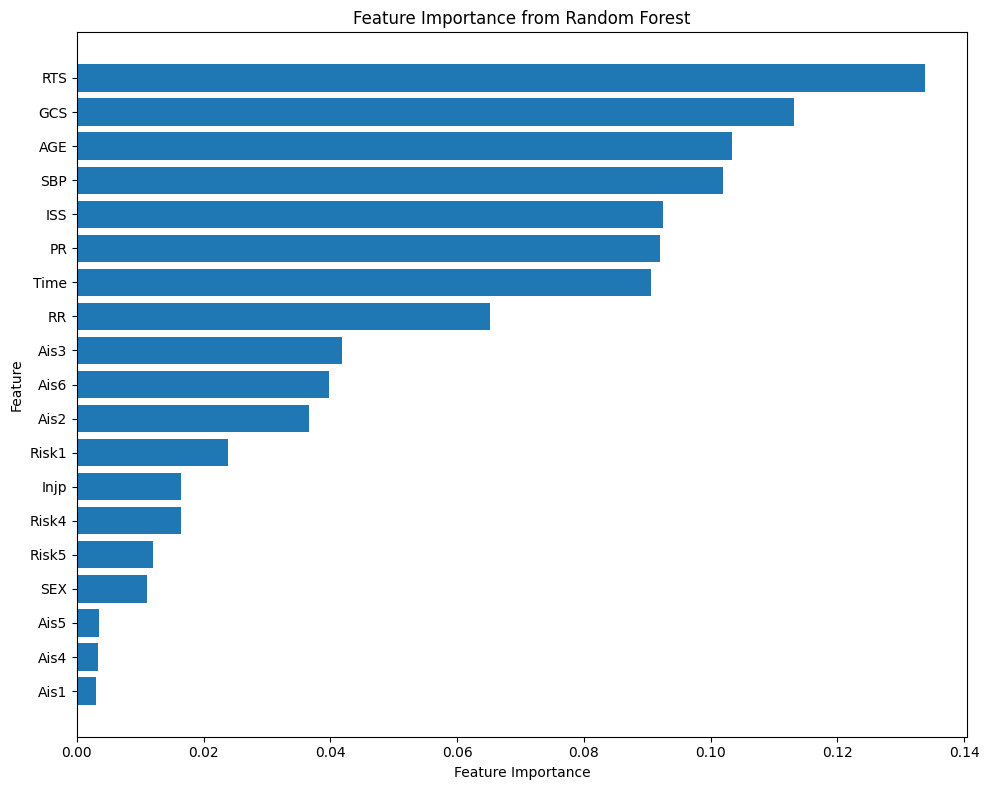

In [6]:
# ดูความสัมพันธ์ระหว่าตัวแปรกับโมเดล
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# -----------------------------
# 1. โหลดข้อมูล
# -----------------------------
df = pd.read_csv('data_selected.csv')  # ← เปลี่ยนชื่อไฟล์ตามของคุณ
X = df.drop('Dead', axis=1)
y = df['Dead']

# -----------------------------
# 2. สร้างและฝึกโมเดล Random Forest
# -----------------------------
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# -----------------------------
# 3. ดึงค่า Feature Importance
# -----------------------------
importances = rf.feature_importances_
feature_names = X.columns

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values('Importance', ascending=False)

print("\n=== Feature Importance (Sorted) ===")
print(importance_df)

# -----------------------------
# 4. บันทึกเป็น Excel เพื่อนำไปใส่วิจัย
# -----------------------------
importance_df.to_excel('feature_importance_randomforest.xlsx', index=False)
print("\n✅ บันทึกตารางแล้ว: feature_importance_randomforest.xlsx")

# -----------------------------
# 5. วาดกราฟแสดงความสำคัญ
# -----------------------------
plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='#1f77b4')
plt.gca().invert_yaxis()  # ให้ฟีเจอร์สำคัญอยู่บน
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Random Forest')
plt.tight_layout()
plt.show()


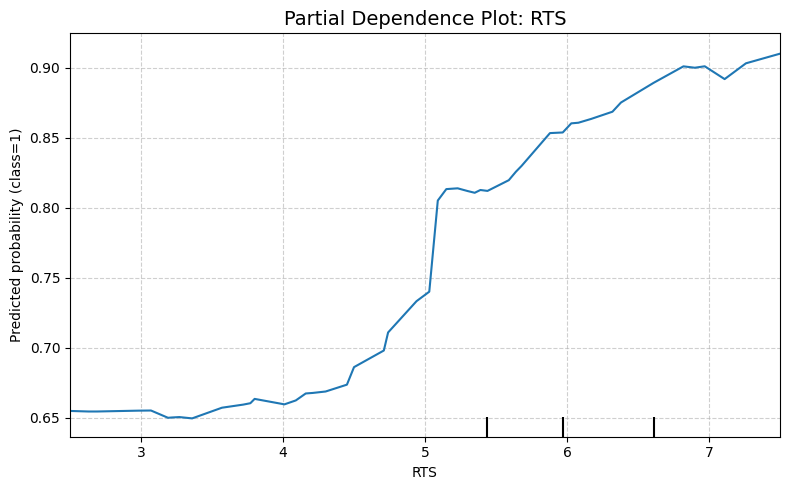

In [7]:
# ดูความสัมพันธ์ระหว่างค่า RTS กับ ความน่าจะเป็นในการรอดชีวิต
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay

# --- สร้าง Partial Dependence Plot ---
fig, ax = plt.subplots(figsize=(8, 5))
PartialDependenceDisplay.from_estimator(
    rf,              # โมเดล RandomForest ที่เทรนแล้ว
    X,               # ชุดข้อมูล (DataFrame)
    ['RTS'],         # ฟีเจอร์ที่อยากดู
    kind='average',  # แบบค่าเฉลี่ย
    ax=ax
)
plt.title('Partial Dependence Plot: RTS', fontsize=14)
plt.xlabel('RTS')
plt.ylabel('Predicted probability (class=1)')

# ✅ จำกัดแกน X ให้แสดงแค่ 0 ถึง 7.5
plt.xlim(2.5, 7.5)

plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()